In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model 
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt

In [2]:
# Load and Prepare Data
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0

In [3]:
# Define the Autoencoder Model 
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img) 
encoded = Dense(32, activation='relu')(encoded) 
decoded = Dense(64, activation='relu')(encoded) 
decoded = Dense(784, activation='sigmoid')(decoded)

In [4]:
autoencoder = Model(input_img, decoded) 

In [5]:
# Compile and Train the Autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.2559 - val_loss: 0.1760
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1595 - val_loss: 0.1437
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1364 - val_loss: 0.1277
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1256 - val_loss: 0.1212
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1200 - val_loss: 0.1161
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1155 - val_loss: 0.1125
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1123 - val_loss: 0.1095
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1098 - val_loss: 0.1072
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1075 - val_loss: 0.1050
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1055 - val_loss: 0.1031

In [6]:
# Predict and Display Results 
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 1ms/step


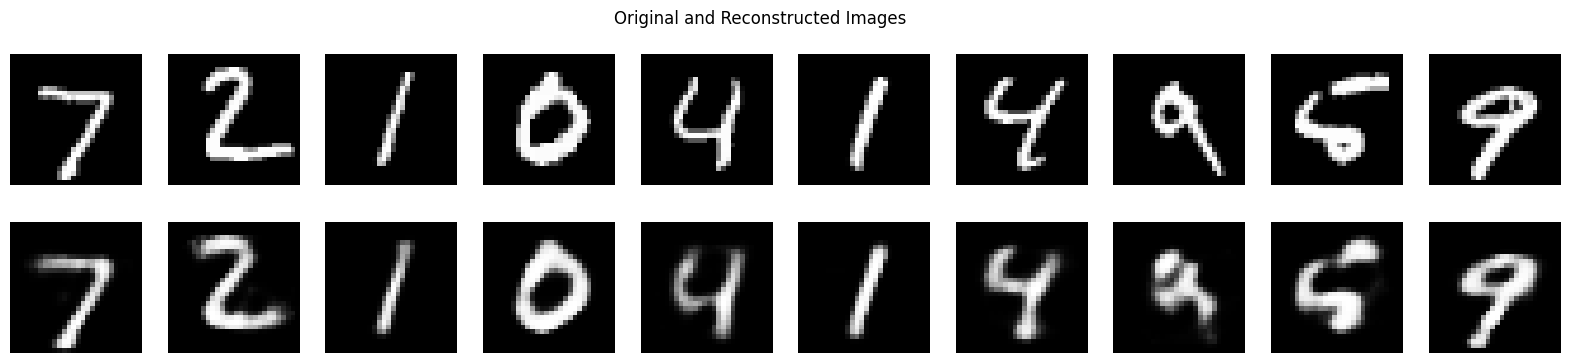

In [10]:
# Plotting original and reconstructed images 
plt.figure(figsize=(20, 4))
for i in range(10):
# Original images
    ax = plt.subplot(2, 10, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray') 
    ax.axis('off')
    # Reconstructed images
    ax = plt.subplot(2, 10, i + 11) 
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray') 
    ax.axis('off')

plt.suptitle('Original and Reconstructed Images')
plt.show()